# Object-oriented programming

You've heard that Python is _objected-oriented_, but haven't found a reason to use an object yourself. Here we'll develop an example where designing an object makes life easier. 

Let's say you've got a series of 1000 lightcurves, each of which contain: 
* times
* fluxes
* uncertainties
* flags

Instead of managing a bunch of arrays to handle these values, we could instead create an object to store light curves. 

## Defining a new object

To create a new object, you use the `class` command, rather than the `def` command that you would use for functions,
```python
class LightCurve(object):
```
We've named the new object LightCurve - object names in python should be uppercase without underscores separating words (whereas functions are usually all lowercase and words are separated by underscores). The `object` in parentheses is the class that `LightCurve` inherits from. 


### The `__init__` method
Now we will define how you call the `LightCurve` constructor (the call that creates new `LightCurve` objects). Let's say you want to be able to create a lightcurve like this...
```python
new_light_curve = LightCurve(times=times, fluxes=fluxes, 
                             uncertainties=uncertainties, flags=flags)
```
All Python objects get initialized with a function called `__init__` defined within the class, like this: 
```python
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None):
```
You define the `__init__` function like all other functions, except that the first argument is always called `self`. This `self` is the shorthand variable that you use to refer to the `LightCurve` object within the `__init__` method.

### Attributes
Objects have _attributes_, which are like variables stored on an object. We'll want to store the values above into the `LightCurve` object, each with their own attribute, like this: 
```python
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        
```
Each attribute is defined by setting `self.<attribute name> = <value>`. All attributes should be defined within the `__init__` method. 

## Example
Let's now create an instance of the `LightCurve` object, and see how it works: 

In [24]:
import numpy as np

# Define the object: 

class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
        
# Create some fake data:
times = np.linspace(0, 10, 100)
sigma = 0.1
fluxes = 1 + sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(fluxes)
flags = np.random.randint(0, 5, len(fluxes))
name = 'proxima Centauri'

# Initialize a LightCurve object:
prox_cen = LightCurve(times=times, fluxes=fluxes, 
                      uncertainties=uncertainties, flags=flags,
                      name=name)

We can see what values are stored in each attribute like this: 

In [19]:
prox_cen.times

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

So far this just looks like another way to store your data. It becomes more powerful when you write _methods_ for your object. Let's make a simple plotting method for the `LightCurve` object, which plots the lightcurve.

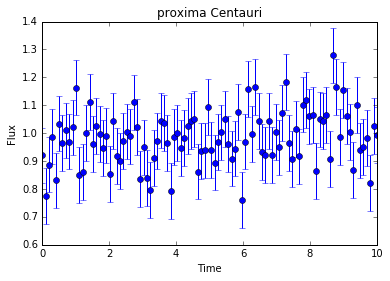

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt 

class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
            
    def plot(self):
        """Plot the lightcurve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

# Initialize a LightCurve object:
prox_cen = LightCurve(times=times, fluxes=fluxes, 
                      uncertainties=uncertainties, flags=flags,
                      name=name)

prox_cen.plot()

Note that you can access the attributes of the object within methods by calling `self.<attribute name>`.

### Class methods

There's more than one way to initialize a lightcurve. Maybe your lightcurves come to you in a particular file type, and you want to be able to load those files directly into a lightcurve object. You could do that with a _class method_, like this:

In [33]:
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
            
    def plot(self):
        """Plot the lightcurve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

    @classmethod
    def from_txt(cls, path):
        data = np.loadtxt(path)
        
        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        return cls(times=times, fluxes=fluxes, 
                   uncertainties=uncertainties, flags=flags)

To get sample light curves to load using the new class method, run the script `generate_lcs.py` from the command line, or with the cell below:

In [63]:
%%bash
python generate_lcs.py

We can now load a lightcurve with the class method like this: 

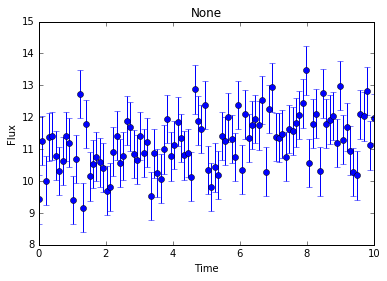

In [64]:
path = 'sample_lcs/lc_0.txt'

lc0 = LightCurve.from_txt(path)

lc0.plot()

Now let's compute the mean flux of each target, taking advantage of the object we've created: 

In [65]:
from glob import glob

# Here are the paths to the lightcurves:
lc_paths = glob('sample_lcs/*.txt')

# let's load all of the light curves with a generator: 
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]

for lightcurve in lightcurves:
    print(lightcurve.fluxes.mean())

11.224717473
10.3539196563
9.51009605899
10.2988077066
9.04200201232
9.16486264207
9.87403169697
11.0565329458
9.26253433823
10.1657225551


And let's plot each lightcurve:

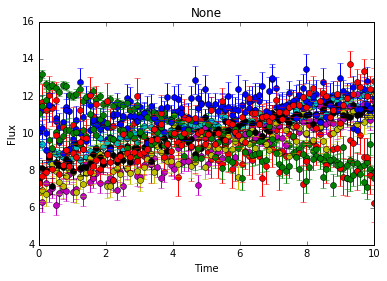

In [66]:
for lightcurve in lightcurves:
    lightcurve.plot()

### A more useful method

Let's "clean" the lightcurves by normalizing out a polynomial trend from each one. We'll do this with a new method. 

In [71]:
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
        
        self.cleaned = False
    
    def plot(self):
        """Plot the lightcurve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

    @classmethod
    def from_txt(cls, path):
        data = np.loadtxt(path)
        
        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        return cls(times=times, fluxes=fluxes, 
                   uncertainties=uncertainties, flags=flags)
    
    def clean(self, order=1):
        # Fit a polynomial trend to the lightcurve: 
        poly_params = np.polyfit(self.times, self.fluxes, order)
        best_fit_model = np.polyval(poly_params, self.times)
        
        # Now normalize each flux by the flux in the best-fit polynomial model
        self.fluxes /= best_fit_model
        self.uncertainties /= best_fit_model
        
        # Change the "cleaned" attribute to True: 
        self.cleaned = True

Let's try it on our data:

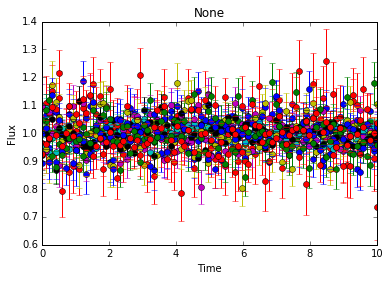

In [72]:
from glob import glob

# Here are the paths to the lightcurves:
lc_paths = glob('sample_lcs/*.txt')

# let's load all of the light curves with a generator: 
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]

for lightcurve in lightcurves:
    lightcurve.clean()
    
    lightcurve.plot()

You can now check to see if a lightcurve has been cleaned with the cleaned attribute: 

In [74]:
lightcurves[0].cleaned

True